In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import datetime
import time
import collections

In [2]:
df = pd.read_csv("../data/positive.csv",header=0)

In [3]:
df1 = df[df["FECHA_DEF"]!="9999-99-99"]

In [4]:
df1.columns

Index(['index', 'FECHA_ACTUALIZACION', 'ID_REGISTRO', 'ORIGEN', 'SECTOR',
       'ENTIDAD_UM', 'SEXO', 'ENTIDAD_NAC', 'ENTIDAD_RES', 'MUNICIPIO_RES',
       'TIPO_PACIENTE', 'FECHA_INGRESO', 'FECHA_SINTOMAS', 'FECHA_DEF',
       'INTUBADO', 'NEUMONIA', 'EDAD', 'NACIONALIDAD', 'EMBARAZO',
       'HABLA_LENGUA_INDIG', 'INDIGENA', 'DIABETES', 'EPOC', 'ASMA',
       'INMUSUPR', 'HIPERTENSION', 'OTRA_COM', 'CARDIOVASCULAR', 'OBESIDAD',
       'RENAL_CRONICA', 'TABAQUISMO', 'OTRO_CASO', 'TOMA_MUESTRA_LAB',
       'RESULTADO_LAB', 'TOMA_MUESTRA_ANTIGENO', 'RESULTADO_ANTIGENO',
       'CLASIFICACION_FINAL', 'MIGRANTE', 'PAIS_NACIONALIDAD', 'PAIS_ORIGEN',
       'UCI'],
      dtype='object')

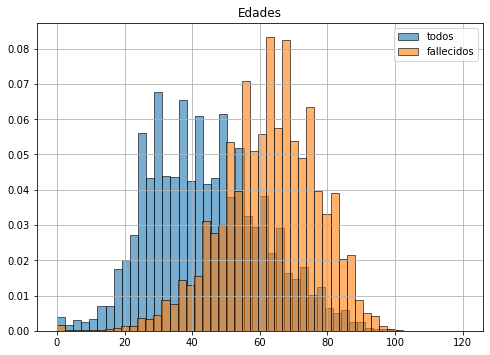

In [5]:
fig = plt.figure(figsize=(8,5.666))
# alpha variable
a = 0.6
# normalization to make sum of histogram bars have value 1
s = df.shape[0]
weights = 1/s*np.ones(df.shape[0])
plt.hist(df["EDAD"],bins=50,ec="k",alpha=a,label="todos",weights=weights)
# normalization to make sum of histogram bars have value 1
s = df1.shape[0]
weights = 1/s*np.ones(df1.shape[0])
plt.hist(df1["EDAD"],bins=50,ec="k",alpha=a,label="fallecidos",weights=weights)
plt.grid()
plt.title("Edades")
plt.legend(loc="upper right")
plt.show()

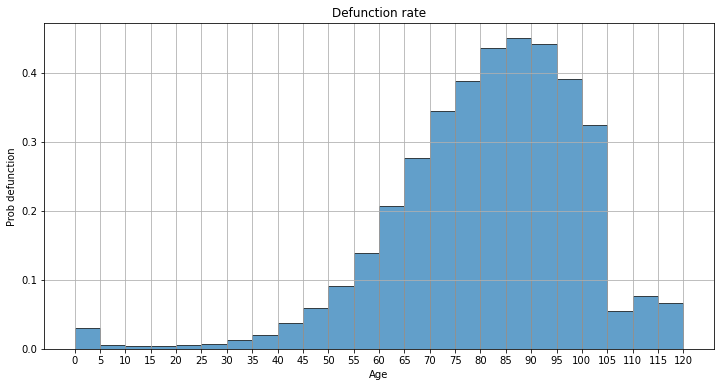

In [7]:
n = 25
vals = np.linspace(df["EDAD"].min(),df["EDAD"].max(),n)
def_per = np.zeros(len(vals)-1)
for i in range(len(vals)-1):
    a = df["EDAD"]>=vals[i] 
    b = df["EDAD"]<vals[i+1] 
    def_per[i] = np.mean(df[a & b]["FECHA_DEF"]!="9999-99-99")
width = vals[1]-vals[0]
fig = plt.figure(figsize=(12,6))
plt.bar(vals[:-1],def_per,width=width,align="edge",ec="k",alpha=0.7)
plt.grid()
plt.title("Defunction rate")
plt.ylabel("Prob defunction")
plt.xlabel("Age")
plt.xticks(vals,[str(int(round(x))) for x in vals])
plt.show()

In [24]:
dfaux = df[df["HIPERTENSION"]==1]
dfuax 

0.0
0.1259259259259259
4.958333333333333
0.07692307692307693
9.916666666666666
0.07142857142857142
14.875
0.039301310043668124
19.833333333333332
0.06869633099141297
24.791666666666664
0.05997725980670836
29.75
0.05555555555555555
34.70833333333333
0.06422924901185771
39.666666666666664
0.08524982672799446
44.625
0.10999593661113369
49.58333333333333
0.1373259330652398
54.541666666666664
0.18565827360166637
59.5
0.2450113747156321
64.45833333333333
0.3114135660921666
69.41666666666666
0.36797856614929786
74.375
0.40916393547972496
79.33333333333333
0.4555941200489996
84.29166666666666
0.46573369005968307
89.25
0.4782345828295042
94.20833333333333
0.42592592592592593
99.16666666666666
0.5
104.125
0.0
109.08333333333333
1.0
114.04166666666666
0.0


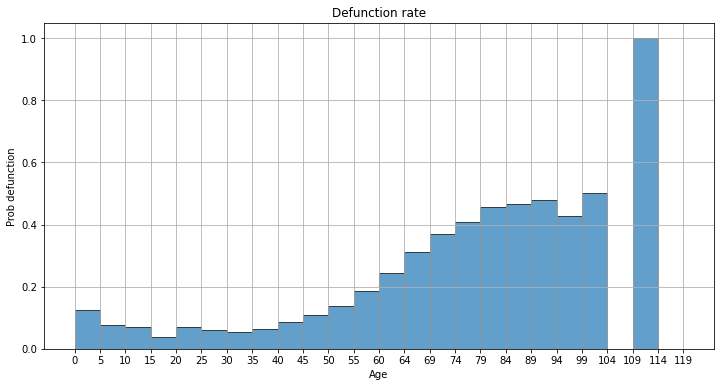

In [25]:
n = 25
vals = np.linspace(dfaux["EDAD"].min(),dfaux["EDAD"].max(),n)
def_per = np.zeros(len(vals)-1)
for i in range(len(vals)-1):
    a = dfaux["EDAD"]>=vals[i] 
    b = dfaux["EDAD"]<vals[i+1]
    def_per[i] = np.mean(dfaux[a & b]["FECHA_DEF"]!="9999-99-99")
    print(vals[i])
    print(def_per[i])
width = vals[1]-vals[0]
fig = plt.figure(figsize=(12,6))
plt.bar(vals[:-1],def_per,width=width,align="edge",ec="k",alpha=0.7)
plt.grid()
plt.title("Defunction rate")
plt.ylabel("Prob defunction")
plt.xlabel("Age")
plt.xticks(vals,[str(int(round(x))) for x in vals])
plt.show()

In [36]:
a = df["HIPERTENSION"]==1
b = df["DIABETES"]==1
dfaux = df[a&b]

0.0
0.16981132075471697
4.833333333333333
0.0
9.666666666666666
0.16666666666666666
14.5
0.1
19.333333333333332
0.11242603550295859
24.166666666666664
0.1329639889196676
29.0
0.09277238403451996
33.83333333333333
0.11953204476093592
38.666666666666664
0.14313870411431387
43.5
0.17669221774717422
48.33333333333333
0.1902289556558005
53.166666666666664
0.22909217755297812
58.0
0.271513353115727
62.83333333333333
0.3315102793885082
67.66666666666666
0.3911874060596472
72.5
0.41476764968722074
77.33333333333333
0.4653997848691287
82.16666666666666
0.45911166459111663
87.0
0.5032679738562091
91.83333333333333
0.48028673835125446
96.66666666666666
0.34
101.5
0.4
106.33333333333333
nan
111.16666666666666
nan


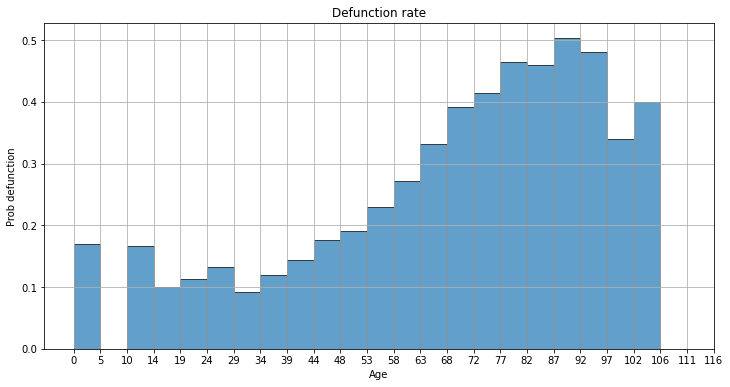

In [37]:
n = 25
vals = np.linspace(dfaux["EDAD"].min(),dfaux["EDAD"].max(),n)
def_per = np.zeros(len(vals)-1)
for i in range(len(vals)-1):
    a = dfaux["EDAD"]>=vals[i] 
    b = dfaux["EDAD"]<vals[i+1]
    def_per[i] = np.mean(dfaux[a & b]["FECHA_DEF"]!="9999-99-99")
    print(vals[i])
    print(def_per[i])
width = vals[1]-vals[0]
fig = plt.figure(figsize=(12,6))
plt.bar(vals[:-1],def_per,width=width,align="edge",ec="k",alpha=0.7)
plt.grid()
plt.title("Defunction rate")
plt.ylabel("Prob defunction")
plt.xlabel("Age")
plt.xticks(vals,[str(int(round(x))) for x in vals])
plt.show()

In [6]:
def strtodate(x):
    return datetime.datetime.strptime(x,"%Y-%m-%d")

117249
117249


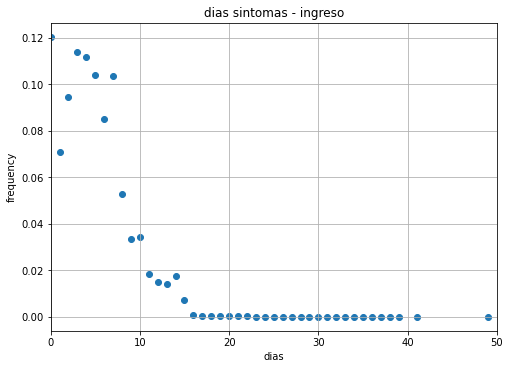

117249
117248


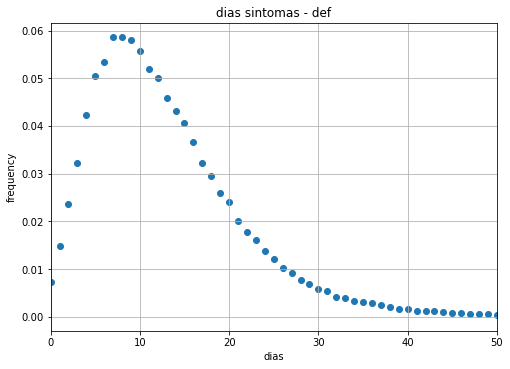

117249
117042


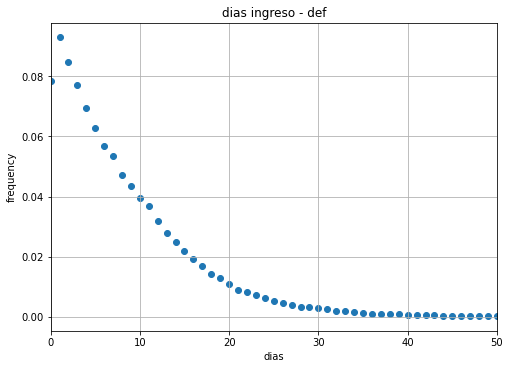

In [7]:
cols = ["FECHA_SINTOMAS","FECHA_INGRESO","FECHA_DEF"]
for i in range(len(cols)):
    for j in range(i+1,len(cols)):
        ts_1 = df1[cols[i]].apply(strtodate).to_numpy()
        ts_2 = df1[cols[j]].apply(strtodate).to_numpy()
        ds =[x.astype("timedelta64[D]").astype(int) for x in ts_2-ts_1]
        print(len(ds))
        # clean mistakes and same day symthoms
        ds = [x for x in ds if x>=0]
        count = collections.Counter(ds)
        xs,ys=zip(*count.most_common())
        s = sum(ys)
        ys = [y/s for y in ys]
        print(len(ds))
        fig = plt.figure(figsize=(8,5.666))
        #plt.hist(ds,bins=50,ec="k",alpha=0.75)
        plt.scatter(xs,ys)
        plt.grid()
        #plt.xscale("log")
        #plt.yscale("log")
        plt.xlabel("dias")
        plt.ylabel("frequency")
        plt.xlim(0,50)
        plt.title("dias {0} - {1}".format(cols[i].split("_")[1].lower(),cols[j].split("_")[1].lower()))
        plt.show()

In [10]:
from scipy.stats import nbinom,gamma

In [11]:
i=0
j=2
ts_1 = df1[cols[i]].apply(strtodate).to_numpy()
ts_2 = df1[cols[j]].apply(strtodate).to_numpy()
ds =[x.astype("timedelta64[D]").astype(int) for x in ts_2-ts_1]
# clean mistakes and same day symthoms
ds = [x for x in ds if x>=0]
count = collections.Counter(ds)
xs,ys=zip(*count.most_common())
s = sum(ys)
ys = np.array([y/s for y in ys])
def err(arr):
    f = gamma(a = arr[0],scale = arr[1])
    ysf = np.array([f.pdf(x) for x in xs])
    return np.linalg.norm(ys-ysf)

In [12]:
from scipy.optimize import minimize
res = minimize(err,[10,2])

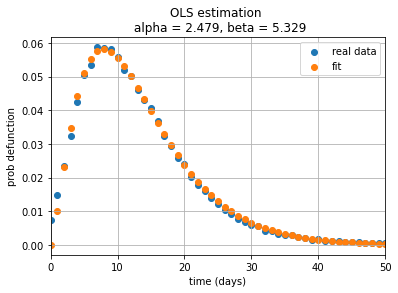

In [45]:
alpha,theta = res.x
f = gamma(a=alpha,scale=theta)
ysf = [f.pdf(x) for x in xs]
plt.scatter(xs,ys,label="real data")
plt.scatter(xs,ysf,label="fit")
plt.grid()
plt.xlim(0,50)
plt.title("OLS estimation \n alpha = {0}, beta = {1}".format(round(alpha,3),round(theta,3)))
plt.xlabel("time (days)")
plt.ylabel("prob defunction")
plt.legend(loc="upper right")
plt.show()

In [38]:
alpha, loc,beta = gamma.fit(ds,5)

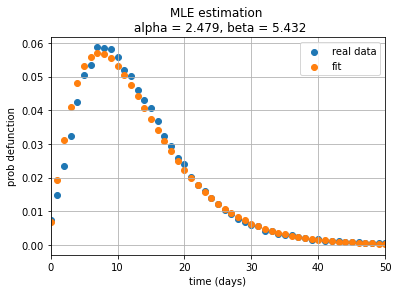

In [48]:
f = gamma(a=alpha,loc=loc,scale=beta)
ysf = [f.pdf(x) for x in xs]
plt.scatter(xs,ys,label="real data")
plt.scatter(xs,ysf,label="fit")
plt.grid()
plt.xlim(0,50)
plt.title("MLE estimation \n alpha = {0}, beta = {1}".format(round(alpha,3),round(beta,3)))
plt.xlabel("time (days)")
plt.ylabel("prob defunction")
plt.legend(loc="upper right")
plt.show()

In [68]:
i=0
j=2
ts_1 = df1[cols[i]].apply(strtodate).to_numpy()
ts_2 = df1[cols[j]].apply(strtodate).to_numpy()
ds =[x.astype("timedelta64[D]").astype(int) for x in ts_2-ts_1]
# clean mistakes and same day symthoms
ds = [x for x in ds if x>=0]
count = collections.Counter(ds)
xs,ys=zip(*count.most_common())
s = sum(ys)
ys = np.array([y/s for y in ys])
def err(arr):
    f = gamma(a = arr[0],scale = arr[1])
    ysf = np.array([f.pdf(x) for x in xs])
    return np.linalg.norm(ys-ysf)

array([2.47941289, 5.32860466])

0.0
10.0
20.0
30.0
40.0
50.0
60.0
70.0
80.0
90.0


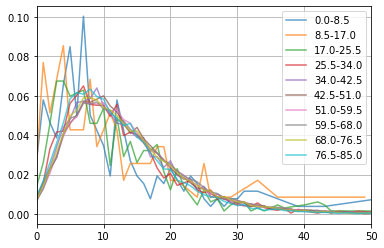

In [98]:
i=0
j=2
n = 11
plt.figure()
vals = np.linspace(df["EDAD"].min(),85,n)
for k in range(len(vals)-1):
    print(k/(n-1)*100)
    a = df1["EDAD"]>=vals[k] 
    b = df1["EDAD"]<vals[k+1]
    dfaux = df1[a & b]
    ts_1 = dfaux[cols[i]].apply(strtodate).to_numpy()
    ts_2 = dfaux[cols[j]].apply(strtodate).to_numpy()
    ds =[x.astype("timedelta64[D]").astype(int) for x in ts_2-ts_1]
    # clean mistakes and same day symthoms
    ds = [x for x in ds if x>=0]
    count = collections.Counter(ds)
    xs,ys=zip(*count.most_common())
    ys = [x for _,x in sorted(zip(xs,ys))]
    xs = sorted(xs)
    s = sum(ys)
    ys = np.array([y/s for y in ys])
    plt.plot(xs,ys,label="{0}-{1}".format(vals[k],vals[k+1]),alpha=0.7)
plt.grid()
plt.legend(loc="upper right")
plt.xlim(0,50)
plt.show()